In [1]:
import numpy 
import pandas 
import tensorflow 
import nltk
# import gensim

print(numpy.__version__)
print(pandas.__version__)
print(tensorflow.__version__)
print(nltk.__version__)
# print(gensim.__version__)

1.21.4
1.3.3
2.6.0
3.6.5


In [2]:
!pip install gensim==3.8.3

     |████████████████████████████████| 23.4 MB 4.8 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=24328218 sha256=8af2887bcda08bd4ee56767f5c2bf3bad89446c2548be19d4398090cfa796de5
  Stored in directory: /aiffel/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.1.2
    Uninstalling gensim-4.1.2:
      Successfully uninstalled gensim-4.1.2


In [3]:
import gensim
print(gensim.__version__)

3.8.3


In [4]:
import pandas as pd
import re

In [22]:
# !pip install konlpy

In [5]:
from konlpy.tag import Mecab

In [32]:
import tensorflow as tf

# 1. data download

In [8]:
# !git clone https://github.com/songys/Chatbot_data.git /aiffel/aiffel/AIFFEL_quest_rs/GoingDeeper/Deep06/data

Cloning into '/aiffel/aiffel/AIFFEL_quest_rs/GoingDeeper/Deep06/data'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 69 (delta 18), reused 4 (delta 4), pack-reused 48 (from 1)
Unpacking objects: 100% (69/69), 398.63 KiB | 3.44 MiB/s, done.


In [6]:
data_dir_path = '/aiffel/aiffel/AIFFEL_quest_rs/GoingDeeper/Deep06/data'

df = pd.read_csv(data_dir_path + '/ChatbotData.csv')

In [7]:
df.head(20)

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
5,SD카드 망가졌어,다시 새로 사는 게 마음 편해요.,0
6,SD카드 안돼,다시 새로 사는 게 마음 편해요.,0
7,SNS 맞팔 왜 안하지ㅠㅠ,잘 모르고 있을 수도 있어요.,0
8,SNS 시간낭비인 거 아는데 매일 하는 중,시간을 정하고 해보세요.,0
9,SNS 시간낭비인데 자꾸 보게됨,시간을 정하고 해보세요.,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11823 entries, 0 to 11822
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q       11823 non-null  object
 1   A       11823 non-null  object
 2   label   11823 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 277.2+ KB


### df['Q'] 중복 데이터 개수 확인

In [67]:
sample_df_Q = df.loc[:, 'Q'].copy()
sample_df_Q.head(10)

0                     12시 땡!
1                1지망 학교 떨어졌어
2               3박4일 놀러가고 싶다
3            3박4일 정도 놀러가고 싶다
4                    PPL 심하네
5                  SD카드 망가졌어
6                    SD카드 안돼
7             SNS 맞팔 왜 안하지ㅠㅠ
8    SNS 시간낭비인 거 아는데 매일 하는 중
9          SNS 시간낭비인데 자꾸 보게됨
Name: Q, dtype: object

In [68]:
len(sample_df_Q)

11823

In [69]:
sample = list(set(sample_df_Q))
len(sample)

11662

# 2. data preprocessing

In [8]:
def preprocess_sentence(sentence) :
    sentence = sentence.lower()
    sentence = re.sub(r'[^a-zA-Z가-힣0-9.,!?]+', '', sentence)
    
    return sentence

# 3. data tokenization
- 소스 문장 데이터와 타겟 문장 데이터를 입력으로 받습니다.
- 데이터를 앞서 정의한 preprocess_sentence() 함수로 정제하고, 토큰화합니다.
- 토큰화는 전달받은 토크나이즈 함수를 사용합니다. 이번엔 mecab.morphs 함수를 전달하시면 됩니다.
- 토큰의 개수가 일정 길이 이상인 문장은 데이터에서 제외합니다.
- 중복되는 문장은 데이터에서 제외합니다. 소스 : 타겟 쌍을 비교하지 않고 소스는 소스대로 타겟은 타겟대로 검사합니다. 중복 쌍이 흐트러지지 않도록 유의하세요!

In [9]:
mecab = Mecab()

### build_corpus() 첫 번째 시도

In [12]:
def build_corpus(src_data, tgt_data, tokenizer, token_n_max):  
    # 소스와 타겟 문장 데이터 처리
    src_corpus, tgt_corpus = [], []
    
    for data, corpus in zip([src_data, tgt_data], [src_corpus, tgt_corpus]):
        for s in data:
            clean_s = preprocess_sentence(s)  # 문장 정제
            tokenized_s = tokenizer.morphs(clean_s)  # 토큰화
            
            # 토큰 개수가 일정 길이 이하인 경우에만 추가
            if len(tokenized_s) <= token_n_max:
#                 corpus.append(" ".join(tokenized_s))  # 토큰 리스트를 문자열로 결합하여 추가
                corpus.append(tokenized_s)
                
                
    # 중복 문장 제거 (1) - TypeError: unhashable type: 'list'
#     src_corpus = list(set(src_corpus))
#     tgt_corpus = list(set(tgt_corpus))
    # 중복 문장 제거 (2) - AssertionError: error: 문장 개수 불일치!
    src_corpus = list(map(list, set(map(tuple, src_corpus))))
    tgt_corpus = list(map(list, set(map(tuple, tgt_corpus))))
    # 중복 문장 제거 (3)
    
    
    # 문장 개수 확인
    assert len(src_corpus) == len(tgt_corpus), "error: 문장 개수 불일치!"
    
    return src_corpus, tgt_corpus


### 에러 발생 (1) TypeError: unhashable type: 'list'

In [41]:
src_data = list(df.loc[:, 'Q'].copy())
tgt_data = list(df.loc[:, 'A'].copy())
TOKEN_N_MAX = 40

que_corpus , ans_corpus = build_corpus(src_data, tgt_data, mecab, TOKEN_N_MAX)

TypeError: unhashable type: 'list'

### 에러 발생 (2) error: 문장 개수 불일치!

In [43]:
src_data = list(df.loc[:, 'Q'].copy())
tgt_data = list(df.loc[:, 'A'].copy())
TOKEN_N_MAX = 40

que_corpus , ans_corpus = build_corpus(src_data, tgt_data, mecab, TOKEN_N_MAX)

AssertionError: error: 문장 개수 불일치!

### < error M >
- 토큰 길이 조건 확인

각 문장의 토큰 길이가 TOKEN_N_MAX 조건을 충족하는지 확인해보세요. 특정 문장이 이 조건을 만족하지 않으면 해당 문장은 src_corpus 또는 tgt_corpus에 추가되지 않을 수 있습니다. 이 경우에는 각 문장의 토큰 길이를 출력해보면 도움이 될 수 있습니다.

- 디버깅 정보 추가

어디에서 문제인지 더 명확히 이해하기 위해, src_corpus와 tgt_corpus의 내용을 출력해보는 것도 좋은 방법입니다. 다음과 같이 수정할 수 있습니다.

In [55]:
src_data = list(df.loc[:, 'Q'].copy())
tgt_data = list(df.loc[:, 'A'].copy())
TOKEN_N_MAX = 20

que_corpus , ans_corpus = build_corpus(src_data, tgt_data, mecab, TOKEN_N_MAX)

AssertionError: error: 문장 개수 불일치!

In [58]:
def build_corpus(src_data, tgt_data, tokenizer, token_n_max):  
    src_corpus, tgt_corpus = [], []
    
    for data, corpus in zip([src_data, tgt_data], [src_corpus, tgt_corpus]):
        for s in data:
            clean_s = preprocess_sentence(s)
            tokenized_s = tokenizer.morphs(clean_s)

            if len(tokenized_s) <= token_n_max:
                corpus.append(tokenized_s)

    # 중복 문장 제거
    src_corpus = list(map(list, set(map(tuple, src_corpus))))
    tgt_corpus = list(map(list, set(map(tuple, tgt_corpus))))
    
    # 문장 개수 확인 및 디버깅 정보 추가
    print(f"Source corpus length: {len(src_corpus)}")
    print(f"Target corpus length: {len(tgt_corpus)}")
    
    assert len(src_corpus) == len(tgt_corpus), "error: 문장 개수 불일치!"
    
    return src_corpus, tgt_corpus


In [59]:
src_data = list(df.loc[:, 'Q'].copy())
tgt_data = list(df.loc[:, 'A'].copy())
TOKEN_N_MAX = 10

que_corpus , ans_corpus = build_corpus(src_data, tgt_data, mecab, TOKEN_N_MAX)

Source corpus length: 9943
Target corpus length: 5870


AssertionError: error: 문장 개수 불일치!

In [70]:
def build_corpus(src_data, tgt_data, tokenizer, token_n_max):  # 1. input data : 소스 문장 데이터와 타겟 문장 데이터
    
    src_corpus, tgt_corpus = [], []
    
    for i in src_data :
        s = i
        clean_s = preprocess_sentence(s)  # 2. 정제 : preprocess_sentence()
        tokenized_src = tokenizer.morphs(clean_s) # 3. 토큰화: 전달 받은 객체의 함수 사용 

        if len(tokenized_src) <= token_n_max :   # 4. 토큰 개수가 일정 길이 이상 -> 제외
            src_corpus.append(tokenized_src)
            
    for i in tgt_data :
        s = i
        clean_s = preprocess_sentence(s)
        tokenized_tgt = tokenizer.morphs(clean_s)

        if len(tokenized_tgt) <= token_n_max : 
            tgt_corpus.append(tokenized_tgt)

    src_corpus = list(map(list, set(map(tuple, src_corpus))))  # 5. 중복 문장 제거 
    tgt_corpus = list(map(list, set(map(tuple, tgt_corpus))))
    
    assert len(src_corpus) == len(tgt_corpus), "error: 문장 개수 불일치!" # debugging
        
    return src_corpus, tgt_corpus
    

In [71]:
src_data = list(df.loc[:, 'Q'].copy())
tgt_data = list(df.loc[:, 'A'].copy())
TOKEN_N_MAX = 100

que_corpus , ans_corpus = build_corpus(src_data, tgt_data, mecab, TOKEN_N_MAX)

AssertionError: error: 문장 개수 불일치!

### ERROR 해결 과정 (1)

- 계속 문장 개수가 불일치 함 
- 그래서 중복 제거 후의 개수 차이를 살펴보니 아래와 같았음 
- 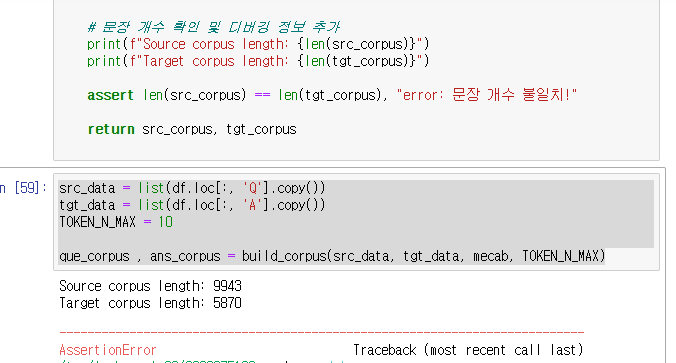
- 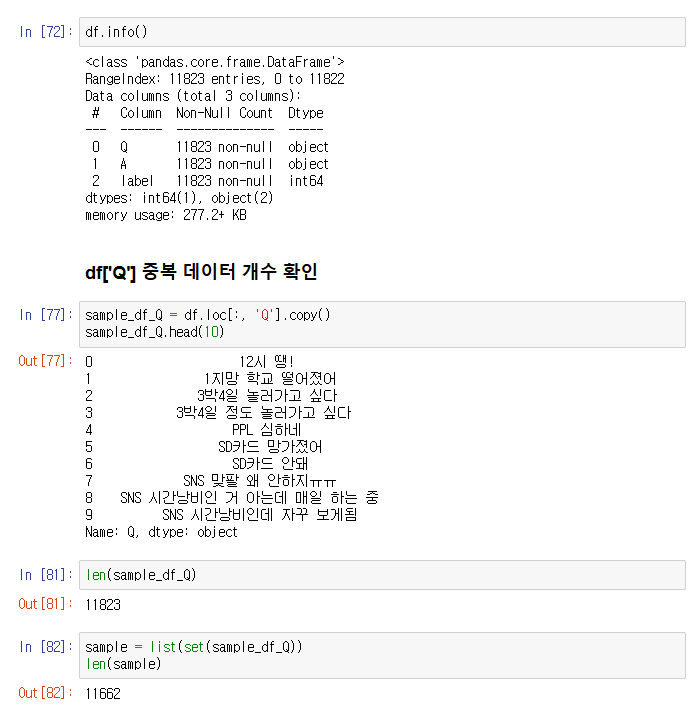
- 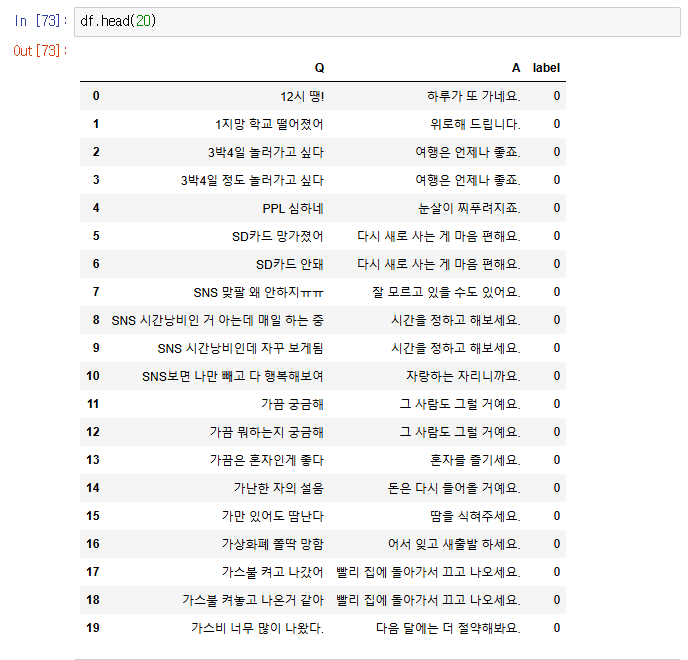

- 따라서, 소스 데이터의 중복 문장을 제거 후, 남아 있는 소스 문장 인덱스와 일치하는 타겟 문장을 가져오는 알고리즘 구성이 필요하다 판단하였음
- index 정보를 유지하기 위해. 함수 인자 입력 시 list 가 아닌, df 그대로 받아올 수 있도록 수정함 

In [13]:
def build_corpus(src_data, tgt_data, tokenizer, token_n_max):  
    # 소스와 타겟 문장 데이터 처리
    src_corpus, tgt_corpus = [], []
    
    for data, corpus in zip([src_data, tgt_data], [src_corpus, tgt_corpus]):
        for s in data.values.flatten():  # DataFrame의 값을 1D 배열로 변환 -> 각 열의 값을 순회함 
            clean_s = preprocess_sentence(s)  # 문장 정제
            tokenized_s = tokenizer.morphs(clean_s)  # 토큰화
            
            # 토큰 개수가 일정 길이 이하인 경우에만 추가
            if len(tokenized_s) <= token_n_max:
                corpus.append(tokenized_s)
    
    # 중복 문장 제거: src_data에서 Q 열의 중복값을 제거하고 남은 인덱스 추출
    unique_src = src_data.drop_duplicates(subset='Q')
    remaining_indices = unique_src.index

    # 남은 인덱스를 기준으로 tgt_data에서 A 열 데이터 선택
    tgt_corpus = tgt_data.loc[remaining_indices].values.flatten().tolist()

    # 중복 문장 제거: src_corpus를 리스트로 변환
    src_corpus = [list(tokens) for tokens in src_corpus if len(tokens) > 0]  # 빈 리스트 제거
    
    print(len(src_corpus))
    print(len(tgt_corpus))
    
    
    
    # 문장 개수 확인
    assert len(src_corpus) == len(tgt_corpus), "error: 문장 개수 불일치!"
    
    return src_corpus, tgt_corpus


In [14]:
src_data = df[['Q']].copy()
tgt_data = df[['A']].copy()

src_data.head(10), tgt_data.head(10)

(                         Q
 0                   12시 땡!
 1              1지망 학교 떨어졌어
 2             3박4일 놀러가고 싶다
 3          3박4일 정도 놀러가고 싶다
 4                  PPL 심하네
 5                SD카드 망가졌어
 6                  SD카드 안돼
 7           SNS 맞팔 왜 안하지ㅠㅠ
 8  SNS 시간낭비인 거 아는데 매일 하는 중
 9        SNS 시간낭비인데 자꾸 보게됨,
                     A
 0          하루가 또 가네요.
 1           위로해 드립니다.
 2         여행은 언제나 좋죠.
 3         여행은 언제나 좋죠.
 4          눈살이 찌푸려지죠.
 5  다시 새로 사는 게 마음 편해요.
 6  다시 새로 사는 게 마음 편해요.
 7    잘 모르고 있을 수도 있어요.
 8       시간을 정하고 해보세요.
 9       시간을 정하고 해보세요.)

In [98]:
TOKEN_N_MAX = 100

que_corpus , ans_corpus = build_corpus(src_data, tgt_data, mecab, TOKEN_N_MAX)

11823
11662


AssertionError: error: 문장 개수 불일치!

### ERROR 해결과정 (2) - 문장 개수 불일치 에러 해결 

- **GPT 선생님, 오늘도 감사합니다...**

    - 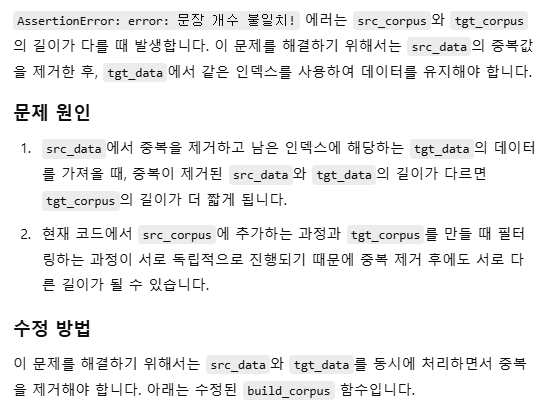

- **수정된 로직은 다음과 같다.**

    - 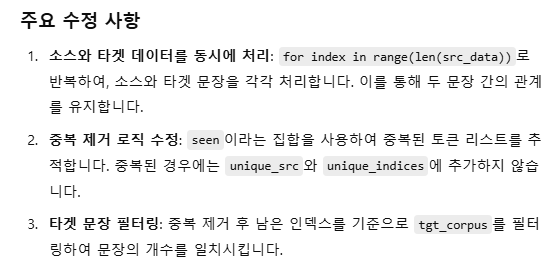

In [10]:
def build_corpus(src_data, tgt_data, tokenizer, token_n_max):  
    # 소스와 타겟 문장 데이터 처리
    src_corpus, tgt_corpus = [], []
    
    # 소스와 타겟 데이터를 함께 순회하며 처리
    for index in range(len(src_data)):
        src_sentence = src_data.iloc[index, 0]  # Q 열 데이터
        tgt_sentence = tgt_data.iloc[index, 0]  # A 열 데이터

        clean_src = preprocess_sentence(src_sentence)  # 소스 문장 정제
        tokenized_src = tokenizer.morphs(clean_src)  # 소스 문장 토큰화

        clean_tgt = preprocess_sentence(tgt_sentence)  # 타겟 문장 정제
        tokenized_tgt = tokenizer.morphs(clean_tgt)  # 타겟 문장 토큰화
        
        # 토큰 개수가 일정 길이 이하인 경우에만 추가
        if len(tokenized_src) <= token_n_max and len(tokenized_tgt) <= token_n_max:
            src_corpus.append(tokenized_src)
            tgt_corpus.append(tokenized_tgt)
    
    # 중복 문장 제거: src_corpus에서 중복을 제거한 인덱스 추출
    unique_src, unique_indices = [], []
    seen = set()
    
    for idx, tokens in enumerate(src_corpus):
        token_tuple = tuple(tokens)  # 리스트를 해시 가능한 튜플로 변환
        if token_tuple not in seen:
            seen.add(token_tuple)
            unique_src.append(tokens)
            unique_indices.append(idx)

    # 남은 인덱스를 기준으로 tgt_corpus 필터링
    tgt_corpus = [tgt_corpus[i] for i in unique_indices]

    print(len(unique_src))  # src_corpus의 길이 출력
    print(len(tgt_corpus))  # tgt_corpus의 길이 출력
    
    # 문장 개수 확인
    assert len(unique_src) == len(tgt_corpus), "error: 문장 개수 불일치!"
    
    return unique_src, tgt_corpus


### 에러 (문장 개수 불일치) 해결 !

In [11]:
src_data = df[['Q']].copy()
tgt_data = df[['A']].copy()

TOKEN_N_MAX = 100

# 구현한 함수로 각각 que_corpus , ans_corpus 에 토큰화하여 저장
que_corpus , ans_corpus = build_corpus(src_data, tgt_data, mecab, TOKEN_N_MAX)

11632
11632


In [12]:
# sample print
for q, a in list(zip(que_corpus,ans_corpus))[100:110] :
    print(f'Q : {q}\nA :{a}\n')

Q : ['거지', '됐', '어']
A :['밥', '사', '줄', '친구', '를', '찾아보', '세요']

Q : ['거짓말', '했', '어']
A :['선의', '의', '거짓말', '이', '길', '바라', '요', '.']

Q : ['거짓말', '을', '나', '도', '모르', '게', '자꾸', '해']
A :['거짓말', '은', '할수록', '늘', '어요', '.']

Q : ['거짓말', '을', '하', '게', '돼']
A :['거짓말', '은', '할수록', '늘', '어요', '.']

Q : ['거짓말', '이', '거짓말', '을', '낳', '아']
A :['진실', '된', '말', '을', '하', '려고', '노력', '해', '보', '세요', '.']

Q : ['걱정', '없이', '살', '고파']
A :['누구', '나', '걱정', '은', '있', '어요', '.']

Q : ['걱정', '좀', '없이', '살', '고', '싶', '다', '.']
A :['누구', '나', '걱정', '은', '있', '어요', '.']

Q : ['건강', '관리']
A :['운동', '을', '해', '보', '세요', '.']

Q : ['건강', '빨리', '회복', '해야지']
A :['세상', '의', '무엇', '보다', '건강', '이', '제일', '중요', '해요', '.']

Q : ['건강', '검진', '왔', '어']
A :['주기', '적', '으로', '해', '주', '는', '게', '좋', '죠', '.']



# 4. Augmentation

###  한국어로 사전 훈련된 Embedding 모델을 다운로드

In [13]:
import zipfile
import os
import numpy as np

def unzip_and_read_bin(zip_file_path, output_dir):
    # 1. zip 파일 해제
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(output_dir)

    # 2. 해제된 파일 중 .bin 파일 찾기
    bin_files = [f for f in os.listdir(output_dir) if f.endswith('.bin')]

    # 3. .bin 파일 읽기
    for bin_file in bin_files:
        bin_file_path = os.path.join(output_dir, bin_file)
        data = np.fromfile(bin_file_path, dtype=np.float32)  # dtype은 필요에 따라 변경
        
        # 4. 데이터 확인 (예: 첫 10개 데이터 출력)
        print(f"Data from {bin_file}: {data[:10]}")
        
    return data, bin_file_path

In [14]:
# 사용 예제
zip_file_path = '/aiffel/aiffel/AIFFEL_quest_rs/GoingDeeper/Deep06/ko.zip'  # 여기에 zip 파일 경로를 입력하세요.
output_dir = data_dir_path   # 해제된 파일을 저장할 디렉토리 경로

# 임베딩 모델 불러오기 
ko_bin, model_path = unzip_and_read_bin(zip_file_path, output_dir)

Data from ko.bin: [1.0720233e+24 1.8393144e+25 7.3404073e+28 1.8729225e+31 4.7431038e+30
 7.2664481e+22 6.6551834e+28 4.9036120e+13 6.8526547e+29 1.2791404e+30]


### 모델 로드 에러 (1)
- UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [15]:
from gensim.models import KeyedVectors

# # ko.bin 경로 설정
# model_path = 'path/to/ko.bin'  # 실제 경로로 변경하세요

# 모델 로드
wv = KeyedVectors.load_word2vec_format(model_path, binary=True)

# 모델 사용 예시
print(wv.most_similar('안녕하세요'))  # '안녕하세요'와 유사한 단어 출력


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

제공해 주신 출력은 ko.bin 파일이 Word2Vec 형식으로 저장된 피클 데이터임을 나타냅니다. 이는 Gensim의 KeyedVectors로 로드할 때 사용되는 형식입니다. 그러나 로드하는 과정에서 UnicodeDecodeError가 발생하는 이유는 Word2Vec 모델 파일이 특정 인코딩으로 저장되어 있으며, Gensim이 이를 올바르게 해석하지 못하기 때문입니다.

- 해결 방법
Gensim의 KeyedVectors 사용: KeyedVectors.load_word2vec_format() 메서드를 사용할 때, 인코딩을 명시적으로 설정하여 로드해 보세요. 특히 encoding 인자를 설정해주어야 합니다. 

### 모델 로드 에러 (2)
- ValueError: invalid literal for int() with base 10: '\x80\x02cgensim.models.word2vec'

In [38]:
from gensim.models import KeyedVectors

# 모델 로드 (encoding='latin1' 또는 'utf-8' 사용)
wv = KeyedVectors.load_word2vec_format(model_path, binary=True, encoding='latin1')

# 모델 사용 예시
print(wv.most_similar('안녕하세요'))  # '안녕하세요'와 유사한 단어 출력


ValueError: invalid literal for int() with base 10: '\x80\x02cgensim.models.word2vec'

### 모델 로드 에러 (3) 
- AttributeError: Can't get attribute 'Vocab' on <module 'gensim.models.word2vec' from '/opt/conda/lib/python3.9/site-packages/gensim/models/word2vec.py'>

In [39]:
from gensim.models import Word2Vec

# 모델 로드 (피클 형식으로 저장된 모델)
# model_path = 'path/to/ko.bin'  # 실제 경로로 변경하세요
model = Word2Vec.load(model_path)  # 피클 형식으로 로드

# KeyedVectors 추출
wv = model.wv  # Word2Vec 모델의 KeyedVectors

# 필요한 경우, KeyedVectors를 새로운 파일로 저장
wv.save('new_ko.kv')


AttributeError: Can't get attribute 'Vocab' on <module 'gensim.models.word2vec' from '/opt/conda/lib/python3.9/site-packages/gensim/models/word2vec.py'>

### [해결] 모델 로드 에러 (4) : 버전 문제로 gensim 다운그레이드 후 실행 

In [36]:
from gensim.models import Word2Vec

ko_model = Word2Vec.load('/aiffel/aiffel/AIFFEL_quest_rs/GoingDeeper/Deep06/data/ko.bin')

# KeyedVectors 추출
wv = ko_model.wv

similar_words = wv.most_similar("강아지")
print(similar_words)

[('고양이', 0.7290452718734741), ('거위', 0.7185635566711426), ('토끼', 0.7056223154067993), ('멧돼지', 0.6950401067733765), ('엄마', 0.6934334635734558), ('난쟁이', 0.6806551218032837), ('한마리', 0.6770296096801758), ('아가씨', 0.6750352382659912), ('아빠', 0.6729634404182434), ('목걸이', 0.6512460708618164)]


### 다시 보니, 커널 재시작 후 코드 변경 없이 잘 진행 된 것을 보면, 위 에러 코드들도 커널 재시작만 했다면 잘 진행되었을 것이라는 생각이 든다. (gensin 다운그레이드 내용이 잘 반영되려면 커널 재시작 해야 함을 뒤늦게 깨달았다!)

In [37]:
# 본 프로젝트 코드에 맞춰 수정한 lexical_sub()
import random


'''
def lexical_sub(sample_sentence, wv) :  # pre-training 임베딩 모델 

    sample_tokens = sample_sentence

    selected_tok = random.choice(sample_tokens) # token 중 랜덤하게 하나 추출 

    result = ""
    for tok in sample_tokens:
        if tok is selected_tok:
            result += wv.most_similar(tok)[0][0] + " "

        else:
            result += tok + " "

    return result
'''


def preprocess_text(text):
    # 중첩 리스트를 풀어서 모든 요소를 하나의 문자열로 변환
    if isinstance(text, list):
        text = ' '.join([subtext if isinstance(subtext, str) else ' '.join(subtext) for subtext in text])
    text = re.sub(r"[^\w\s]", "", text)  # 구두점 제거
    return text

def lexical_sub(list_sample_sentence, wv):
    result = ""
    sample_tokens = preprocess_text(list_sample_sentence).split(' ') # space 분리 
    selected_tok = random.choice([tok for tok in sample_tokens if tok]) if sample_tokens else None  # 토큰이 비어있는 경우를 방지하여 무작위로 선택

    for tok in sample_tokens:
        try:
            if tok == selected_tok:
                result += wv.most_similar(tok)[0][0] + " "  # 유사한 단어가 있을 경우 첫 번째 유사 단어로 대체
            else:
                result += tok + " "  # 비슷한 단어가 없으면 원래 토큰 사용
        except KeyError:
            # 토큰이 어휘에 없을 경우 원래 단어를 그대로 사용하거나 다른 처리를 여기에 추가
            result += tok + " "
    
    return result.strip()


In [38]:
print(lexical_sub(que_corpus[:5], wv))  # debugging

TypeError: expected string or bytes-like object

### 1) Augmentation된 que_corpus 와 원본 ans_corpus 가 병렬을 이루도록 하기

In [39]:
# que_corpus 증강
# que_corpus의 각 문장을 증강하여 리스트로 저장
agmt_que = [lexical_sub(sentence, wv) for sentence in que_corpus]

# DataFrame으로 변환
df_agmt_que = pd.DataFrame(agmt_que, columns=["augmented_que_text"])
df_agmt_que.head()


,augmented_que_text
0,12 시 땡
1,1 지망 학교의 떨어졌 어
2,3 박 4 일 살 러 가 고 싶 다
3,3 박 4 일 정도 놀 러 놀드 고 싶 다
4,ppl 강하 네


In [19]:
# 공백을 기준으로 분리하여 새로운 열에 저장
df_agmt_que_tokens = pd.DataFrame()

df_agmt_que_tokens["augmented_que_text"] = df_agmt_que["augmented_que_text"].apply(lambda x: x.split())
df_agmt_que_tokens.head()

,augmented_que_text
0,"[12, 시, 땡]"
1,"[1, 지망, 학교, 떨어졌, 어]"
2,"[3, 박, 4, 일, 놀, 러, 가, 고, 싶, 다]"
3,"[3, 박, 4, 일, 정도, 놀, 러, 가, 고, 싶, 다]"
4,"[ppl, 강하, 네]"


In [20]:
df_agmt_que_tokens['ans_text'] = ans_corpus.copy()
df_agmt_que_tokens.head()

,augmented_que_text,ans_text
0,"[12, 시, 땡]","[하루, 가, 또, 가, 네요, .]"
1,"[1, 지망, 학교, 떨어졌, 어]","[위로, 해, 드립니다, .]"
2,"[3, 박, 4, 일, 놀, 러, 가, 고, 싶, 다]","[여행, 은, 언제나, 좋, 죠, .]"
3,"[3, 박, 4, 일, 정도, 놀, 러, 가, 고, 싶, 다]","[여행, 은, 언제나, 좋, 죠, .]"
4,"[ppl, 강하, 네]","[눈살, 이, 찌푸려, 지, 죠, .]"


### 2) 이후엔 반대로 원본 que_corpus 와 Augmentation된 ans_corpus 가 병렬을 이루도록 하기

In [21]:
# ans_corpus 증강
# ans_corpus 증강
# ans_corpus 각 문장을 증강하여 리스트로 저장
agmt_ans = [lexical_sub(sentence, wv) for sentence in ans_corpus]

# DataFrame으로 변환
df_agmt_ans = pd.DataFrame(agmt_ans, columns=["augmented_ans_text"])
df_agmt_ans.head()


,augmented_ans_text
0,하루 가 또 가 군요
1,위로 해의 드립니다
2,여행 은 언제나 괜찮 죠
3,여행 은 언제나 괜찮 죠
4,눈살 이 찌푸려 꼼짝 죠


In [22]:
# 공백을 기준으로 분리하여 새로운 열에 저장
df_agmt_ans_tokens = pd.DataFrame()

df_agmt_ans_tokens["augmented_ans_text"] = df_agmt_ans["augmented_ans_text"].apply(lambda x: x.split())
df_agmt_ans_tokens.head()

,augmented_ans_text
0,"[하루, 가, 또, 가, 군요]"
1,"[위로, 해의, 드립니다]"
2,"[여행, 은, 언제나, 괜찮, 죠]"
3,"[여행, 은, 언제나, 괜찮, 죠]"
4,"[눈살, 이, 찌푸려, 꼼짝, 죠]"


In [23]:
df_agmt_ans_tokens['que_text'] = que_corpus.copy()

df_agmt_ans_tokens = df_agmt_ans_tokens[["que_text", "augmented_ans_text"]]
df_agmt_ans_tokens.head()

,que_text,augmented_ans_text
0,"[12, 시, 땡, !]","[하루, 가, 또, 가, 군요]"
1,"[1, 지망, 학교, 떨어졌, 어]","[위로, 해의, 드립니다]"
2,"[3, 박, 4, 일, 놀, 러, 가, 고, 싶, 다]","[여행, 은, 언제나, 괜찮, 죠]"
3,"[3, 박, 4, 일, 정도, 놀, 러, 가, 고, 싶, 다]","[여행, 은, 언제나, 괜찮, 죠]"
4,"[ppl, 심하, 네]","[눈살, 이, 찌푸려, 꼼짝, 죠]"


### 3) 전체 데이터가 원래의 3배가량으로 늘어나도록 하기 

In [24]:
df_origin = pd.DataFrame()

df_origin['que_text'] = que_corpus   ## 기억: 데이터프레임 생성 시 리스트 그대로 넣는 것임 
df_origin['ans_text'] = ans_corpus

df_origin.head()

,que_text,ans_text
0,"[12, 시, 땡, !]","[하루, 가, 또, 가, 네요, .]"
1,"[1, 지망, 학교, 떨어졌, 어]","[위로, 해, 드립니다, .]"
2,"[3, 박, 4, 일, 놀, 러, 가, 고, 싶, 다]","[여행, 은, 언제나, 좋, 죠, .]"
3,"[3, 박, 4, 일, 정도, 놀, 러, 가, 고, 싶, 다]","[여행, 은, 언제나, 좋, 죠, .]"
4,"[ppl, 심하, 네]","[눈살, 이, 찌푸려, 지, 죠, .]"


In [25]:
import pandas as pd

# 열 이름 통일

df_agmt_que_tokens.rename(columns={'augmented_que_text': 'que_text'}, inplace=True)
df_agmt_ans_tokens.rename(columns={'augmented_ans_text': 'ans_text'}, inplace=True)

# DataFrame을 행 기준으로 이어붙이기
df_all_data = pd.concat([df_origin, df_agmt_que_tokens, df_agmt_ans_tokens], axis=0, ignore_index=True)

# 결과 확인
df_all_data.iloc[11630:11640, :]

,que_text,ans_text
11630,"[힘든, 연애, 좋, 은, 연애, 라는, 게, 무슨, 차이, 일까, ?]","[잘, 헤어질, 수, 있, 는, 사이, 여부, 인, 거, 같, 아요, .]"
11631,"[힘들, 어서, 결혼, 할까봐]","[도피성, 결혼, 은, 하, 지, 않, 길, 바라, 요, .]"
11632,"[12, 시, 땡]","[하루, 가, 또, 가, 네요, .]"
11633,"[1, 지망, 학교, 떨어졌, 어]","[위로, 해, 드립니다, .]"
11634,"[3, 박, 4, 일, 놀, 러, 가, 고, 싶, 다]","[여행, 은, 언제나, 좋, 죠, .]"
11635,"[3, 박, 4, 일, 정도, 놀, 러, 가, 고, 싶, 다]","[여행, 은, 언제나, 좋, 죠, .]"
11636,"[ppl, 강하, 네]","[눈살, 이, 찌푸려, 지, 죠, .]"
11637,"[sd, 카드, 망가졌, 어]","[다시, 새로, 사, 는, 게, 마음, 편해요, .]"
11638,"[sd, 카드, 안, 돼]","[다시, 새로, 사, 는, 게, 마음, 편해요, .]"
11639,"[sns, 들어맞, 팔, 왜, 안, 하, 지]","[잘, 모르, 고, 있, 을, 수, 도, 있, 어요, .]"


In [26]:
len(df_all_data), print(len(que_corpus)*3)

34896


(34896, None)

### 데이터 증강 및 이어붙이기가 잘 수행되었음을 확인할 수 있다.

# 5. data Vectorization 

In [40]:
#sample_data = ["12", "시", "땡", "!"]

#print(["<start>"] + sample_data + ["<end>"])

# "ans_text" 열을 복사하여 작업
df_ans_text_copy = df_all_data['ans_text'].copy()

# 각 행의 리스트에 "<start>"와 "<end>"를 추가
for idx in range(len(df_ans_text_copy)):
    df_ans_text_copy.iloc[idx] = ["<start>"] + df_ans_text_copy.iloc[idx] + ["<end>"]

df_ans_text_copy.head()


0    [<start>, <start>, 하루, 가, 또, 가, 네요, ., <end>, ...
1     [<start>, <start>, 위로, 해, 드립니다, ., <end>, <end>]
2    [<start>, <start>, 여행, 은, 언제나, 좋, 죠, ., <end>,...
3    [<start>, <start>, 여행, 은, 언제나, 좋, 죠, ., <end>,...
4    [<start>, <start>, 눈살, 이, 찌푸려, 지, 죠, ., <end>,...
Name: ans_text, dtype: object

In [41]:
que_corpus = df_all_data['que_text'].copy()
ans_corpus = df_ans_text_copy

In [42]:
df_all_data['ans_text'] = df_ans_text_copy
df_all_data.head()

,que_text,ans_text
0,"[12, 시, 땡, !]","[<start>, <start>, 하루, 가, 또, 가, 네요, ., <end>, ..."
1,"[1, 지망, 학교, 떨어졌, 어]","[<start>, <start>, 위로, 해, 드립니다, ., <end>, <end>]"
2,"[3, 박, 4, 일, 놀, 러, 가, 고, 싶, 다]","[<start>, <start>, 여행, 은, 언제나, 좋, 죠, ., <end>,..."
3,"[3, 박, 4, 일, 정도, 놀, 러, 가, 고, 싶, 다]","[<start>, <start>, 여행, 은, 언제나, 좋, 죠, ., <end>,..."
4,"[ppl, 심하, 네]","[<start>, <start>, 눈살, 이, 찌푸려, 지, 죠, ., <end>,..."


### 전체 데이터에 대한 단어 사전 구축, 벡터화 

In [43]:
'''
데이터셋 내 문장 길이 분포
적절한 최대 문장 길이 지정
keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가
'''

total_data_text = list(que_corpus) + list(ans_corpus)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print(f'전체 문장의 {np.sum(num_tokens < max_tokens) / len(num_tokens)}%가 maxlen 설정값 이내에 포함됩니다. ')

문장길이 평균 :  9.446297569922054
문장길이 최대 :  44
문장길이 표준편차 :  4.348048944154125
pad_sequences maxlen :  18
전체 문장의 0.9714723750573132%가 maxlen 설정값 이내에 포함됩니다. 


### 단어 사전 구축 및 벡터화에서 이해가 덜 되었다. 지난 디엘톤 때도 벡터화 코드를 구성하는 것이 어려웠는데 여전히 이해가 되지 않았다.

In [44]:
enc_train = tf.keras.preprocessing.sequence.pad_sequences(que_corpus,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', 
                                                        maxlen=maxlen)
dec_train = tf.keras.preprocessing.sequence.pad_sequences(ans_corpus,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', 
                                                        maxlen=maxlen)

NameError: name 'word_to_index' is not defined

### 이 방법이 아닌 것 같다 !
### 트랜스포머 챗봇에서 사용했던 'SubwordTextEncoder' 를 사용해보겠다.

In [ ]:
vocab_size = 10000    # 어휘 사전의 크기 (10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# 6. Training

In [ ]:
# Positional Encoding 구현
def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, (2*(i//2)) / np.float32(d_model))

    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])

    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])


    return sinusoid_table

# Mask  생성하기
def generate_padding_mask(seq):
    # TODO: 구현
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32) # .cast : tensor dataType 변환 시 사용 
    return seq[:, tf.newaxis, tf.newaxis, :]

def generate_lookahead_mask(size):
    # TODO: 구현
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)  # 이해 안 됨 
    return mask

def generate_masks(src, tgt):
    # TODO: 구현
    enc_mask = generate_padding_mask(src)
    dec_enc_mask = generate_padding_mask(src)

    dec_lookahead_mask =generate_lookahead_mask(tgt.shape[1])
    dec_tgt_padding_mask = generate_padding_mask(tgt)
    dec_mask = tf.maximum(dec_tgt_padding_mask, dec_lookahead_mask)

    return enc_mask, dec_enc_mask, dec_mask


In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        
        self.depth = d_model // self.num_heads
        
        self.W_q = tf.keras.layers.Dense(d_model)
        self.W_k = tf.keras.layers.Dense(d_model)
        self.W_v = tf.keras.layers.Dense(d_model)
        
        self.linear = tf.keras.layers.Dense(d_model)

    def scaled_dot_product_attention(self, Q, K, V, mask):
        # TODO: 구현
        d_k = tf.cast(K.shape[-1], tf.float32) # tensor type 변환, Q. K.shape[-1] 의미는? // Q. 왜 float32 아니고 tf.float32 ?
        QK = tf.matmul(Q, K, transpose_b = True) # matmul() : 두 텐서의 행렬 곱셈(내적)을 계산하는 함수

        scaled_qk = QK / tf.math.sqrt(d_k)

        if mask is not None : scaled_qk += (mask * -1e9)  # 수식이 가지는 의미 ??

        attentions = tf.nn.softmax(scaled_qk, axis=-1)  # softmax(), axis=-1 의 의미 ?? 
        out = tf.matmul(attentions, V)  # 행렬곱 (내적)

        return out, attentions
        
    def split_heads(self, x):
        # TODO: 구현
        bsz = x.shape[0]  # x.shape[0]의 의미 ?? 
        split_x = tf.reshape(x, (bsz, -1, self.num_heads, self.depth)) 
        split_x = tf.transpose(split_x, perm=[0, 2, 1, 3])  # 차원 변환 

        return split_x

    def combine_heads(self, x):
        # TODO: 구현
        bsz = x.shape[0]  # batch size = 입력텐서 x의 0번째 차원 
        combined_x = tf.transpose(x, perm=[0, 2, 1, 3])
        combined_x = tf.reshape(combined_x, (bsz, -1, self.d_model))

        return combined_x

    
    def call(self, Q, K, V, mask):
        WQ = self.W_q(Q)    # 입력 쿼리,키,값에 대한 선형 변환 
        WK = self.W_k(K)
        WV = self.W_v(V)
        
        WQ_splits = self.split_heads(WQ)  # 여러 어텐션 헤드로 분리 
        WK_splits = self.split_heads(WK)
        WV_splits = self.split_heads(WV)
        
        out, attention_weights = self.scaled_dot_product_attention(
            WQ_splits, WK_splits, WV_splits, mask) # 어텐션 점수와 가중치 계산
                        
        out = self.combine_heads(out) # 어텐션 헤드 결합 -> 최종 결과 텐서 생성
        out = self.linear(out) # 최종 선형 변환 
            
        return out, attention_weights

In [ ]:
### Position-wise Feed Forward Network 구현

class PoswiseFeedForwardNet(tf.keras.layers.Layer):
    def __init__(self, d_model, d_ff):
        super(PoswiseFeedForwardNet, self).__init__()
        self.d_model = d_model
        self.d_ff = d_ff

        self.fc1 = tf.keras.layers.Dense(d_ff, activation='relu')  # 입력 x의 차원을 d_ff 로 확장, activation function 적용 (relu -> 비선형성 추가)
        self.fc2 = tf.keras.layers.Dense(d_model) # 확장된 차원을 다시 d_model로 축소 (-> 입력 차원과 일치시킴)
        ##### Q. 차원을 확장하는 이유는? 다시 줄이는 이유는?  
        ##### A. 두 단계의 변환 -> 고차원 공간에서의 특징 학습, 모델 학습 능력 향상시킴, 트랜스포머 성능 높임 
        ##### 벡터화 시키는 것을 말함 
        ## Dense layer : 선형 변환 수행 

    def call(self, x):
        out = self.fc1(x)
        out = self.fc2(out)
            
        return out

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, n_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()

        self.enc_self_attn = MultiHeadAttention(d_model, n_heads)
        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, mask):
        '''
        Multi-Head Attention
        '''
        # 잔차 연결을 위한 원본 입력 저장
        residual = x  
        # 입력 x를 정규화
        out = self.norm_1(x)
        # 멀티헤드 어텐션 수행: 자기 자신을 쿼리, 키, 값으로 사용
        out, enc_attn = self.enc_self_attn(out, out, out, mask)
        # Dropout 적용
        out = self.do(out)
        # 원본 입력과 결과를 더해 잔차 연결
        out += residual

        '''
        Position-Wise Feed Forward Network
        '''
        # 잔차 연결을 위한 중간 결과 저장
        residual = out  
        # 정규화 적용
        out = self.norm_2(out)
        # 포지션-와이즈 피드 포워드 네트워크 수행
        out = self.ffn(out)
        # Dropout 적용
        out = self.do(out)
        # 원본 입력과 결과를 더해 잔차 연결
        out += residual

        return out, enc_attn


In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()

        self.dec_self_attn = MultiHeadAttention(d_model, num_heads)  # 디코더 자기 어텐션
        self.enc_dec_attn = MultiHeadAttention(d_model, num_heads)   # 인코더-디코더 어텐션

        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)  # 포지션-와이즈 피드 포워드 네트워크

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)  # 정규화 레이어
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)  # 드롭아웃 레이어

    
    def call(self, x, enc_out, dec_enc_mask, padding_mask):
        '''
        Masked Multi-Head Attention
        '''
        residual = x  # 현재 입력 x를 residual에 저장하여 후에 잔차 연결에 사용
        out = self.norm_1(x) # 입력 x를 정규화
        out, dec_attn = self.dec_self_attn(out, out, out, padding_mask) # 쿼리(Q), 키(K), 값(V) 모두 out으로 설정하고, padding_mask를 사용하여 특정 위치를 마스킹함
                    ## 이 단계는 이전 단어들에만 의존하여 다음 단어를 예측하도록 함 
        out = self.do(out) # 드롭아웃을 적용하여 과적합을 방지함 
        out += residual # 원래 입력 x와 결과 out을 더하여 잔차 연결을 생성함 

        '''
        Multi-Head Attention
        '''
        residual = out # 중간 결과 저장 -> 후속 잔차 연결에서 사용 
        out = self.norm_2(out) # 출력 정규화 
        # Q, K, V 순서에 주의하세요!
        out, dec_enc_attn = self.enc_dec_attn(Q=out, K=enc_out, V=enc_out, mask=dec_enc_mask)
        out = self.do(out) # 드롭아웃 적용 
        out += residual # 잔차연결 생성 
        
        '''
        Position-Wise Feed Forward Network
        '''
        residual = out # 중간 결과 저장 
        out = self.norm_3(out) # 출력 정규화 
                ### Q. 세 번의 출력 정규화에서 왜 각각 다른 레이어 객체를 생성하여 사용하는가? 
        out = self.ffn(out) # 포지션-와이즈 피드포워드 넷 
        out = self.do(out) 
        out += residual 

        return out, dec_attn, dec_enc_attn  # 최종 출력 out과 두 개의 어텐션 가중치 (디코더 자기 어텐션, 인코더-디코더 어텐션)

In [ ]:
# Encoder 구현
class Encoder(tf.keras.Model):
    def __init__(self,
                    n_layers, # 인코더 레이어 개수 
                    d_model,  # 모델 차원 
                    n_heads,  # 멀티헤드 어텐션 헤드 개수  
                    d_ff,  # 포지션-와이즈 피드포워드 넷 차원 (ex. 2048)
                    dropout):  # do 비율 (ex. 0.1)
        super(Encoder, self).__init__()  
        self.n_layers = n_layers  # 해당 개수만큼 인코더레이어 객체를 생성 -> 리스트 저장 (트랜스포머 인코더 레이어 구성함)
        self.enc_layers = [EncoderLayer(d_model, n_heads, d_ff, dropout) 
                        for _ in range(n_layers)]
    
        self.do = tf.keras.layers.Dropout(dropout)  # 드롭아웃 적용 위한 do 레이어 초기화 
        
    def call(self, x, mask):
        # TODO: 구현
        out = x
    
        enc_attns = list()
        for i in range(self.n_layers):
            out, enc_attn = self.enc_layers[i](out, mask) # 각 레이어에 대해 호출 
            enc_attns.append(enc_attn) # 각 레이어의 어텐션 가중치 저장 
        
        return out, enc_attns
print("슝=3")

In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    dropout):
        super(Decoder, self).__init__()
        self.n_layers = n_layers  # n_layers만큼 DecoderLayer 객체를 생성하여 리스트에 저장
        self.dec_layers = [DecoderLayer(d_model, n_heads, d_ff, dropout) 
                            for _ in range(n_layers)]
                            
    def call(self, x, enc_out, dec_enc_mask, padding_mask):
                # x : 디코더 입력 시퀀스, 이전에 예측된 토큰들로 이루어진 시퀀스
                # enc_out: 인코더의 출력, 즉 디코더가 어텐션을 수행할 대상
                # dec_enc_mask: 인코더 출력에 대한 마스크로, 디코더의 인코더-디코더 어텐션 단계에서 사용
                # padding_mask: 패딩된 위치를 마스킹하기 위한 텐서로, 디코더 자기 어텐션에 사용
        
        out = x  # 초기 출력을 x로 설정 

        dec_attns = list()  # 각 디코더 레이어에서 계산된 어텐션 가중치를 저장할 리스트 초기화 
        dec_enc_attns = list()
        for i in range(self.n_layers): 
            out, dec_attn, dec_enc_attn = \
            self.dec_layers[i](out, enc_out, dec_enc_mask, padding_mask)
                    # 각 디코더 레이어에서 셀프어텐션, 인코더-디코더 어텐션, 포지션-와이즈 피드포워드 넷 수행됨 
                    # dec_attn : 각 디코더 레이어에서 수행된 셀프어텐션 가중치
                    # dec_enc_attn : 각 디코더 레이어에서 수행된 인코더-디코더 어텐션의 가중치 

            dec_attns.append(dec_attn) # 가중치를 리스트에 추가 
            dec_enc_attns.append(dec_enc_attn) # 인코더-디코더 어텐션 가중치를 리스트에 추가 

        return out, dec_attns, dec_enc_attns  # 디코더 레이어의 셀프어텐션, 인코더-디코더 어텐션 가중치 반환 

In [ ]:
class Transformer(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    src_vocab_size,  # 소스 단어 집합 크기 
                    tgt_vocab_size,  # 타겟 단어 집합 크기 
                    pos_len,         # 포지셔널 인코딩 길이 
                    dropout=0.2,     # Q. 드롭아웃 비율이 무엇을 의미하더라 ?
                    shared_fc=True,  # 임베딩과 FC레이어의 가중치를 공유할지 여부 
                    shared_emb=False):  # 인코더-디코더 임베딩 공유할지 여부 
        super(Transformer, self).__init__() 
        
        self.d_model = tf.cast(d_model, tf.float32)

        if shared_emb:
            self.enc_emb = self.dec_emb = \
            tf.keras.layers.Embedding(src_vocab_size, d_model)
        else:
            self.enc_emb = tf.keras.layers.Embedding(src_vocab_size, d_model)
            self.dec_emb = tf.keras.layers.Embedding(tgt_vocab_size, d_model)

        self.pos_encoding = positional_encoding(pos_len, d_model)
        self.do = tf.keras.layers.Dropout(dropout)

        self.encoder = Encoder(n_layers, d_model, n_heads, d_ff, dropout)
        self.decoder = Decoder(n_layers, d_model, n_heads, d_ff, dropout)

        self.fc = tf.keras.layers.Dense(tgt_vocab_size)

        self.shared_fc = shared_fc

        if shared_fc:
            self.fc.set_weights(tf.transpose(self.dec_emb.weights))

    def embedding(self, emb, x):
        seq_len = x.shape[1]

        out = emb(x)

        if self.shared_fc: out *= tf.math.sqrt(self.d_model)

        out += self.pos_encoding[np.newaxis, ...][:, :seq_len, :]
        out = self.do(out)

        return out

        
    def call(self, enc_in, dec_in, enc_mask, dec_enc_mask, dec_mask):
        enc_in = self.embedding(self.enc_emb, enc_in)
        dec_in = self.embedding(self.dec_emb, dec_in)

        enc_out, enc_attns = self.encoder(enc_in, enc_mask)
        
        dec_out, dec_attns, dec_enc_attns = \
        self.decoder(dec_in, enc_out, dec_enc_mask, dec_mask)
        
        logits = self.fc(dec_out)
        
        return logits, enc_attns, dec_attns, dec_enc_attns

In [ ]:
# 주어진 하이퍼파라미터로 Transformer 인스턴스 생성

transformer = Transformer(
    n_layers=2,
    d_model=512,
    n_heads=8,
    d_ff=2048,
    src_vocab_size=VOCAB_SIZE,
    tgt_vocab_size=VOCAB_SIZE,
    pos_len=200,
    dropout=0.3,
    shared_fc=True,
    shared_emb=True)

d_model = 512

print("슝=3")

In [ ]:
# Learning Rate Scheduler 구현
class LearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(LearningRateScheduler, self).__init__()
        
        self.d_model = d_model
        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        # TODO: 구현
        arg1 = step ** -0.5
        arg2 = step * (self.warmup_steps ** -1.5)
        
        return (self.d_model ** -0.5) * tf.math.minimum(arg1, arg2)
print("슝=3")

In [ ]:
# Learning Rate 인스턴스 선언 & Optimizer 구현

learning_rate = LearningRateScheduler(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate,
                                    beta_1 = 0.9,
                                    beta_2 = 0.98,
                                    epsilon = 1e-9)

print("슝=3")

In [ ]:
# Loss Function 정의
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    # TODO: 구현
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    
    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)
print("슝=3")

In [ ]:
# Train Step 정의
@tf.function()
def train_step(src, tgt, model, optimizer):
    # TODO: 구현    
    tgt_in = tgt[:, :-1]  # Decoder의 input
    gold = tgt[:, 1:]     # Decoder의 output과 비교하기 위해 right shift를 통해 생성한 최종 타겟

    enc_mask, dec_enc_mask, dec_mask = generate_masks(src, tgt_in)

    with tf.GradientTape() as tape:
        predictions, enc_attns, dec_attns, dec_enc_attns = \
        model(src, tgt_in, enc_mask, dec_enc_mask, dec_mask)
        loss = loss_function(gold, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    return loss, enc_attns, dec_attns, dec_enc_attns
print("슝=3")

In [ ]:
### 승환님 코드 

EPOCHS = 3 

for epoch in range(EPOCHS):
    total_loss = 0
    
    dataset_count = tf.data.experimental.cardinality(train_dataset).numpy()
    tqdm_bar = tqdm(enumerate(train_dataset), total=dataset_count, desc=f'Epoch {epoch+1}/{EPOCHS}')

    for batch, (src, tgt) in tqdm_bar:
        batch_loss, enc_attns, dec_attns, dec_enc_attns = \
        train_step(src, tgt, transformer, optimizer)  

        total_loss += batch_loss
        
        tqdm_bar.set_description_str('Epoch %2d' % (epoch + 1))
        tqdm_bar.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1))) 


# 예문
1. 지루하다, 놀러가고 싶어.
2. 오늘 일찍 일어났더니 피곤하다.
3. 간만에 여자친구랑 데이트 하기로 했어.
4. 집에 있는다는 소리야.

---

# 제출

Translations
> 1. 잠깐 쉬 어도 돼요 . <end>
> 2. 맛난 거 드세요 . <end>
> 3. 떨리 겠 죠 . <end>
> 4. 좋 아 하 면 그럴 수 있 어요 . <end>

Hyperparameters
> n_layers: 1
> d_model: 368
> n_heads: 8
> d_ff: 1024
> dropout: 0.2

Training Parameters
> Warmup Steps: 1000
> Batch Size: 64
> Epoch At: 10


# 7. BLEU Score